In [3]:
import pandas as pd
import numpy as np
import plotly.express as pl

In [4]:
train = pd.read_csv('train.csv',
                    parse_dates=['Дата закрытия обращения',
                                 'Дата восстановления',
                                 'Дата обращения',
                                 'Крайний срок']).rename({'Решение             ': 'Решение'}, axis=1)

In [24]:
train['Дата обращения'] = pd.to_datetime(train['Дата обращения'], )

In [35]:
train['Дата обращения'].dt.hour

0         9
1         9
2        22
3        23
4        23
         ..
14798    13
14799    13
14800    13
14801    13
14802    13
Name: Дата обращения, Length: 14803, dtype: int64

In [46]:
train['hour'] = train['Дата обращения'].dt.hour
train['day'] = train['Дата обращения'].dt.day
train['month'] = train['Дата обращения'].dt.month

In [64]:
train['month']

0        1
1        1
2        1
3        1
4        1
        ..
14798    2
14799    2
14800    2
14801    2
14802    2
Name: month, Length: 14803, dtype: int64

In [71]:
counts_m = train.groupby(['hour','day'], as_index=False).agg('count').iloc[:, :3]

In [117]:
train['tt'] = train['month'].astype('str') +' '+  train['day'].astype('str') + ' '+ train['hour'].astype('str')

In [131]:
co_h = train.groupby(['tt', 'Место']).agg('count').iloc[:,:1]

In [230]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,hour,day,month,tt
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К,9,19,1,1 19 9
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36:00,Запрос,Запрос,Тест,...,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К,9,19,1,1 19 9
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,...,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,22,25,1,1 25 22
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,...,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177,23,25,1,1 25 23
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,23,25,1,1 25 23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,...,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50,13,16,2,2 16 13
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,...,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3,13,16,2,2 16 13
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,...,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163,13,16,2,2 16 13
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09:00,Запрос,Запрос,выполнено,...,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3,13,16,2,2 16 13


In [231]:
co_h = train.groupby(['tt', 'Место', 'Сервис']).agg(['count', 'nunique', 'unique'])

In [232]:
co_h

Содержание          \
                               count nunique   
tt      Место    Сервис                        
1 19 9  К        АРМ               2       2   
1 25 22 Место190 Сервис7           1       1   
1 25 23 Место177 АРМ               1       1   
        Место19  АРМ               1       1   
        Место197 Сервис21          1       1   
...                              ...     ...   
2 9 9   Место6   АРМ               4       1   
        Место65  Сервис71          3       1   
        Место7   Сервис9           1       1   
        Место72  Сервис13          1       1   
        Место78  Сервис26          1       1   

                                                                              \
                                                                      unique   
tt      Место    Сервис                                                        
1 19 9  К        АРМ                              [Тест, Тестовое обращение]   
1 25 22 Место190 Сервис7          [Выполнена разблокировка у/з REGION\*****]   
1 25 23 Место177 АРМ                                     [.Не включается ПК]   
        Место19  АРМ         [ПЭВМ периодически работает с повышенным шумом]   
        Место197 Сервис21     [Запрос на изменение учетной записи Система21]   
...                                                                      ...   
2 9 9   Место6   АРМ                                      [Создание запроса]   
        Место65  Сервис71  [Заявка на предоставление и отзыв прав доступа...   
        Место7   Сервис9   [Заявка на предоставление и отзыв прав доступа...   
        Место72  Сервис13  [Заявка на предоставление и отзыв прав доступа...   
        Место78  Сервис26                                        [Система26]   

                          Приоритет                      Статус          \
                              count nunique       unique  count nunique   
tt      Место    Сервис                                                   
1 19 9  К        АРМ              2       1   [3-Низкий]      2       1   
1 25 22 Место190 Сервис7          1       1  [2-Средний]      1       1   
1 25 23 Место177 АРМ              1       1   [3-Низкий]      1       1   
        Место19  АРМ              1       1   [3-Низкий]      1       1   
        Место197 Сервис21         1       1  [2-Средний]      1       1   
...                             ...     ...          ...    ...     ...   
2 9 9   Место6   АРМ              4       1   [3-Низкий]      4       1   
        Место65  Сервис71         3       1   [3-Низкий]      3       1   
        Место7   Сервис9          1       1   [3-Низкий]      1       1   
        Место72  Сервис13         1       1  [2-Средний]      1       1   
        Место78  Сервис26         1       1  [2-Средний]      1       1   

                                     Функциональная группа  ...       Система  \
                              unique                 count  ...        unique   
tt      Место    Сервис                                     ...                 
1 19 9  К        АРМ       [Отменен]                     2  ...        [База]   
1 25 22 Место190 Сервис7    [Закрыт]                     1  ...    [Система7]   
1 25 23 Место177 АРМ        [Закрыт]                     1  ...        [База]   
        Место19  АРМ        [Закрыт]                     1  ...        [База]   
        Место197 Сервис21  [Отменен]                     1  ...   [Система21]   
...                              ...                   ...  ...           ...   
2 9 9   Место6   АРМ        [Закрыт]                     4  ...        [База]   
        Место65  Сервис71   [Закрыт]                     3  ...  [Система138]   
        Место7   Сервис9    [Закрыт]                     1  ...    [Система9]   
        Место72  Сервис13   [Закрыт]                     1  ...   [Система13]   
        Место78  Сервис26   [Закрыт]                     1  ...   [Система26]   

                           hour               

In [233]:
co_p = co_h[co_h.iloc[:, :4]['Содержание']['nunique'] == 1]

In [234]:
co_p

Содержание          \
                               count nunique   
tt      Место    Сервис                        
1 25 22 Место190 Сервис7           1       1   
1 25 23 Место177 АРМ               1       1   
        Место19  АРМ               1       1   
        Место197 Сервис21          1       1   
        Место216 АРМ               5       1   
...                              ...     ...   
2 9 9   Место6   АРМ               4       1   
        Место65  Сервис71          3       1   
        Место7   Сервис9           1       1   
        Место72  Сервис13          1       1   
        Место78  Сервис26          1       1   

                                                                              \
                                                                      unique   
tt      Место    Сервис                                                        
1 25 22 Место190 Сервис7          [Выполнена разблокировка у/з REGION\*****]   
1 25 23 Место177 АРМ                                     [.Не включается ПК]   
        Место19  АРМ         [ПЭВМ периодически работает с повышенным шумом]   
        Место197 Сервис21     [Запрос на изменение учетной записи Система21]   
        Место216 АРМ             [Заявка № ***********, *******************]   
...                                                                      ...   
2 9 9   Место6   АРМ                                      [Создание запроса]   
        Место65  Сервис71  [Заявка на предоставление и отзыв прав доступа...   
        Место7   Сервис9   [Заявка на предоставление и отзыв прав доступа...   
        Место72  Сервис13  [Заявка на предоставление и отзыв прав доступа...   
        Место78  Сервис26                                        [Система26]   

                          Приоритет                      Статус          \
                              count nunique       unique  count nunique   
tt      Место    Сервис                                                   
1 25 22 Место190 Сервис7          1       1  [2-Средний]      1       1   
1 25 23 Место177 АРМ              1       1   [3-Низкий]      1       1   
        Место19  АРМ              1       1   [3-Низкий]      1       1   
        Место197 Сервис21         1       1  [2-Средний]      1       1   
        Место216 АРМ              5       1   [3-Низкий]      5       1   
...                             ...     ...          ...    ...     ...   
2 9 9   Место6   АРМ              4       1   [3-Низкий]      4       1   
        Место65  Сервис71         3       1   [3-Низкий]      3       1   
        Место7   Сервис9          1       1   [3-Низкий]      1       1   
        Место72  Сервис13         1       1  [2-Средний]      1       1   
        Место78  Сервис26         1       1  [2-Средний]      1       1   

                                     Функциональная группа  ...  \
                              unique                 count  ...   
tt      Место    Сервис                                     ...   
1 25 22 Место190 Сервис7    [Закрыт]                     1  ...   
1 25 23 Место177 АРМ        [Закрыт]                     1  ...   
        Место19  АРМ        [Закрыт]                     1  ...   
        Место197 Сервис21  [Отменен]                     1  ...   
        Место216 АРМ        [Закрыт]                     5  ...   
...                              ...                   ...  ...   
2 9 9   Место6   АРМ        [Закрыт]                     4  ...   
        Место65  Сервис71   [Закрыт]                     3  ...   
        Место7   Сервис9    [Закрыт]                     1  ...   
        Место72  Сервис13   [Закрыт]                     1  ...   
        Место78  Сервис26   [Закрыт]                     1  ...   

                                     Система  hour                  day  \
                                      unique count nunique unique count   
tt      Место    Сервис                                                   
1 25 22 Место190 

In [218]:
penis = {}
penis_a = {}

In [235]:
un = co_p[co_p['Содержание']['count'] > 2]['Содержание'].reset_index()

In [240]:
un['Сервис'].value_counts()

АРМ          181
Сервис2       65
Сервис22      60
Сервис13      44
Сервис8       42
Сервис7       40
Сервис61      34
Сервис21      25
Сервис71      21
Сервис23      18
Сервис18      16
Сервис52      15
Сервис11      13
Сервис25      11
Сервис12      10
Сервис26       9
Сервис158      9
Сервис132      8
Сервис58       8
Сервис20       7
Сервис19       7
Сервис95       5
Сервис39       5
Сервис73       4
Сервис41       3
Сервис205      3
Сервис93       3
Сервис154      3
Сервис31       3
Сервис36       2
Сервис122      2
Сервис269      2
Сервис43       2
Сервис125      2
Сервис54       2
Сервис90       2
Сервис108      1
Сервис47       1
Сервис138      1
Сервис77       1
Сервис37       1
Сервис131      1
Сервис56       1
Сервис129      1
Сервис3        1
Сервис44       1
Сервис107      1
Сервис136      1
Name: Сервис, dtype: int64

In [227]:
for i in un.values:
    for a in i[-1]:
        penis[a] = penis.get(a, 0) + 1
        penis_a[a] = penis.get(a, 0) + i[2]


In [229]:
dict(sorted(penis_a.items(), key=lambda item: item[1]))

{'заявка': 4,
 'Система8. Перевыпуск рутокена': 4,
 '[ФЗ_АД_Cоздание пользователя Система52]': 4,
 'Блокировка учетной записи': 4,
 'Разблокировать учетную запись Система94': 4,
 'Разблокировать УЗ NE_BOSS\\******': 4,
 'Дистанционные курсы/тесты': 4,
 'Включение учётной записи': 4,
 'Ремонт МФУ': 4,
 'Заявка на редактирование сведений': 4,
 'Перевод заявки в статус 1': 4,
 'Разблокировка учетной записи пользователя в Система7 (домен BOSS)': 4,
 'Перемещение имущества': 4,
 'Устранение ошибки': 4,
 'Выполнена разблокировка у/з BOSS\\*****': 4,
 'Выполнена разблокировка учетной записи REGION\\*****': 4,
 'Ремонт светильников': 4,
 'регистрация файл Сертификат': 4,
 'Заявка на подключение ПЭВМ к ЛВС': 4,
 'Заявка на учетную запись': 4,
 '(Адре№118)(Копирование)(Нет)(Нарочно) КМР': 4,
 '<Бот-наблюдения> Система54. Ухудшение статуса сервиса.  ': 4,
 '(Копия) Замена\\добавление Сертификат-файла на сервере  Система8': 4,
 'Тема обращения: Отключение учётной записи': 4,
 'Сообщить об ошибке/н

In [214]:
penis

{'Настройка Система8 (для учёта выполненных работ)': 1,
 'Заявки': 2,
 'Создание Запрос для пользователей': 2,
 'Заявка на предоставление и отзыв прав доступа к ресурсам': 12,
 'Контроль ПУ. Заявка на доступ к портам.': 3,
 'Заявка на предоставление доступа работникамДепартаментКоторыйОтвечает (но это не точно)': 2,
 'Настройка ПК': 1,
 'Заявка № ***********, *******************': 14,
 'О предоставлении доступа к ресурсу с ПК': 2,
 'НЕ ВЫПОЛНЯТЬ ДО 05.02 Письмо Random***** Управление учетными записями Система7 на основе заявок': 2,
 'Письмо Random49657 - Заявка на предоставление доступа к файловому ресурсу Система46': 1,
 'IP адреса сотрудников': 4,
 'Заявка': 2,
 'Система20': 1,
 'Установка обновления': 4,
 'Просьба создать Запрос': 4,
 'запросы на выполнение работ': 3,
 '"Письмо Random49594" - Заявка на предоставление прав логического доступа': 1,
 'Сервисы SNS#1 - Расширенные сервисы': 1,
 'Настройка клиентских рабочих мест Система46': 3,
 'Письмо Random34658 Подключение пользовател

In [189]:
(train['Место'] == train['Сервис']).sum()

0

In [171]:
co_h[co_h['Содержание'] > 15].sort_values(by='Содержание')

ValueError: cannot join with no overlapping index names

In [ ]:
2 1 9    Место90

In [193]:
train[(train['tt'] == '2 1 9') & (train['Место'] == 'Место90')]['Содержание'].unique()

array(['IP адреса сотрудников'], dtype=object)

In [145]:
train[(train['tt'] == '2 11 11') & (train['Место'] == 'Место10')]['Содержание'].unique()

array(['При попытке зайти в Система22, выдается сообщение "Незарегистрированный пользователь".',
       'Настройка ЭП в Сервис22',
       '(Адре№118)(Копирование)(Нет)(Нарочно) КМР'], dtype=object)

In [143]:
train[(train['tt'] == '1 28 11') & (train['Место'] == 'Место8')]['Содержание'].unique()

array([], dtype=object)

In [141]:
train[(train['tt'] == '1 31 16') & (train['Место'] == 'Место8')]['Содержание'].unique()

array(['Письмо Random49657 - Заявка на предоставление доступа к файловому ресурсу Система46'],
      dtype=object)

In [127]:
co_h.sort_values(by='Содержание')

,tt,Содержание
221,2 13 8,1
37,1 27 19,1
258,2 15 21,1
255,2 15 19,1
84,1 30 10,1
...,...,...
301,2 2 7,158
124,2 1 13,161
66,1 28 8,163
45,1 27 8,177


In [130]:
train[train['tt'] == '1 28 8']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,hour,day,month,tt
2093,Необходимо предоставить доступ учетной записи ...,АРМ,3-Низкий,Закрыт,ФГ38,2018-02-02 09:17,2018-01-28 08:02:00,Запрос,Запрос,Пользователь включен в группу ********,...,2018-01-28 14:11,2018-02-07 07:44,4-Нет,4-Нет влияния,База,Место57,8,28,1,1 28 8
2094,Заявка на предоставление и отзыв прав доступа ...,Сервис11,3-Низкий,Закрыт,ФГ13,2018-02-09 10:34,2018-01-28 08:04:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-01-31 09:01,2018-02-07 10:22,4-Нет,4-Нет влияния,Система11,Место157,8,28,1,1 28 8
2095,Заявка на предоставление и отзыв прав доступа ...,Сервис11,3-Низкий,Закрыт,ФГ13,2018-02-11 09:33,2018-01-28 08:04:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-01-28 10:34,2018-02-04 11:53,4-Нет,4-Нет влияния,Система11,Место157,8,28,1,1 28 8
2096,Заявка на предоставление логического доступа к...,АРМ,3-Низкий,Закрыт,ФГ143,2018-02-02 09:20,2018-01-28 08:05:00,Запрос,Запрос,заявка исполнена,...,2018-01-31 07:10,2018-01-31 11:46,4-Нет,4-Нет влияния,База,Место116,8,28,1,1 28 8
2097,Разблокировка учетной записи пользователя в Си...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-02 09:22,2018-01-28 08:07:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,...,2018-01-28 08:07,2018-02-04 09:28,1-Особая,3-Малое,Система7,Место2,8,28,1,1 28 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,Подключение пользователя к Система22,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-03 10:16,2018-01-28 08:58:00,Запрос,Запрос,Работы по обращению выполнены.,...,2018-01-31 13:48,2018-02-07 15:09,2-Повышенная,3-Малое,Система13,Место115,8,28,1,1 28 8
2252,Подключение пользователя к Система22,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-15 02:36,2018-01-28 08:59:00,Запрос,Запрос,Работы по обращению выполнены.,...,2018-02-03 03:46,2018-02-10 07:53,2-Повышенная,3-Малое,Система13,Место115,8,28,1,1 28 8
2253,Система8. Перевыпуск рутокена,Сервис8,3-Низкий,Закрыт,ФГ129,2018-02-02 10:14,2018-01-28 08:59:00,Запрос,Запрос,выполнено,...,2018-01-28 09:16,2018-02-04 10:36,2-Повышенная,3-Малое,База,Место34,8,28,1,1 28 8
2254,Заявка на предоставление и отзыв прав доступа ...,Сервис13,2-Средний,Закрыт,ФГ13,2018-02-01 10:14,2018-01-28 08:59:00,Запрос,Запрос,Работы по обращению выполнены,...,2018-01-28 09:05,2018-02-04 10:24,1-Особая,4-Нет влияния,Система13,Место47,8,28,1,1 28 8


In [98]:
co = train.groupby(['Дата обращения'], as_index=False).agg('count').iloc[:, :2]

In [109]:
co[co['Содержание'] > 10].sort_values('Содержание')

,Дата обращения,Содержание
6885,2018-02-14 12:12:00,11
200,2018-01-26 08:55:00,12
693,2018-01-27 08:52:00,12
1734,2018-01-31 09:24:00,12
2382,2018-02-01 12:08:00,12
1574,2018-01-31 05:21:00,13
7109,2018-02-15 06:39:00,13
3703,2018-02-04 08:26:00,14
2612,2018-02-02 04:24:00,14
7730,2018-02-16 09:10:00,14


In [110]:
train[train['Дата обращения'] == '2018-02-04 02:55:00']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,hour,day,month
7205,"Заявка № ***********, *******************",Сервис158,3-Низкий,Закрыт,ФГ381,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,КПУ настроен согласно заявки,0,2018-02-04 07:05,2018-02-11 08:25,4-Нет,4-Нет влияния,Система164,Место185,2,4,2
7206,"Заявка № ***********, *******************",Сервис7,2-Средний,Закрыт,ФГ825,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 02:36,2018-02-14 07:52,1-Особая,4-Нет влияния,Система7,Место143,2,4,2
7207,"Заявка № ***********, *******************",Сервис158,3-Низкий,Закрыт,ФГ381,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,КПУ настроен согласно заявки,0,2018-02-04 06:58,2018-02-11 08:25,4-Нет,4-Нет влияния,Система164,Место185,2,4,2
7208,"Заявка № ***********, *******************",Сервис158,3-Низкий,Закрыт,ФГ381,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,КПУ настроен согласно заявки,0,2018-02-04 07:10,2018-02-11 08:36,4-Нет,4-Нет влияния,Система164,Место185,2,4,2
7209,"Заявка № ***********, *******************",Сервис158,3-Низкий,Закрыт,ФГ381,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,КПУ настроен согласно заявки,0,2018-02-04 07:01,2018-02-11 08:25,4-Нет,4-Нет влияния,Система164,Место185,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:47,2018-02-15 07:54,1-Особая,4-Нет влияния,Система58,Место146,2,4,2
7280,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:46,2018-02-15 07:54,1-Особая,4-Нет влияния,Система58,Место146,2,4,2
7281,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:46,2018-02-15 07:54,1-Особая,4-Нет влияния,Система58,Место146,2,4,2
7282,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:46,2018-02-15 07:54,1-Особая,4-Нет влияния,Система58,Место146,2,4,2


In [102]:
train[train['Дата обращения'] == '2018-02-01 08:06:00']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,hour,day,month
4222,NaN,Сервис93,3-Низкий,Отменен,ФГ626,2018-02-02 07:06,2018-02-01 08:06:00,Инцидент,Инцидент,Зарегистрирован ошибочно.,0,NaN,2018-02-01 08:09,2-Повышенная,3-Малое,Система92,Место277,8,1,2


In [94]:
train[train['Содержание'].str.startswith('Заявка №') == 1]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,hour,day,month
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,23,25,1
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216,23,25,1
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216,23,25,1
7,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:15,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216,23,25,1
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216,23,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,"Заявка № ***********, *******************",Сервис7,2-Средний,Закрыт,ФГ359,2018-02-21 11:21,2018-02-16 10:07:00,Запрос,Запрос,Доступ предоставлен.,0,2018-02-16 10:24,2018-02-23 11:39,1-Особая,4-Нет влияния,Система7,Место157,10,16,2
14609,"Заявка № ***********, *******************",Сервис7,2-Средний,Закрыт,ФГ359,2018-02-21 11:21,2018-02-16 10:07:00,Запрос,Запрос,Доступ предоставлен.,0,2018-02-16 10:25,2018-02-23 11:45,1-Особая,4-Нет влияния,Система7,Место157,10,16,2
14664,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ371,2018-02-21 02:51,2018-02-16 10:37:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-17 05:49,2018-02-24 07:54,4-Нет,4-Нет влияния,База,Место164,10,16,2
14665,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ335,2018-03-10 04:06,2018-02-16 10:37:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-21 05:38,2018-03-07 07:54,4-Нет,4-Нет влияния,База,Место146,10,16,2


In [90]:
train[(train['day'] == 4) & (train['hour'] == 2)].sort_values(by='Дата закрытия обращения')['Содержание'][7214]

'Заявка № ***********, *******************'

<Axes: xlabel='hour'>

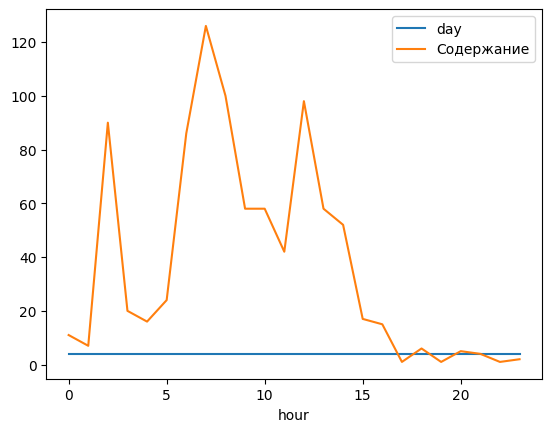

In [83]:
counts_m[counts_m['day'] == 4].plot(x  = 'hour')

In [17]:
counts_m = train.groupby('Место', as_index=False).agg('count').iloc[:, :2]

In [21]:
counts_m.sort_values(by='Содержание')

,Место,Содержание
235,Место382,1
212,Место336,1
249,Место415,1
247,Место407,1
33,Место130,1
...,...,...
267,Место57,327
1,К,409
200,Место32,519
2,Место1,744


In [13]:
counts = train.groupby('Дата обращения', as_index=False).agg('count').iloc[:, :2]

In [15]:
counts[counts['Содержание'] > 1]

,Дата обращения,Содержание
4,2018-01-25 23:39:00,7
15,2018-01-26 01:52:00,4
20,2018-01-26 02:09:00,2
24,2018-01-26 02:36:00,7
29,2018-01-26 02:56:00,3
...,...,...
7861,2018-02-16 12:40:00,3
7862,2018-02-16 12:41:00,2
7863,2018-02-16 12:42:00,2
7865,2018-02-16 12:49:00,5


In [109]:
train.drop(['Сервис', 'Функциональная группа'], axis=1)

,Содержание,Приоритет,Статус,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,3-Низкий,Отменен,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,3-Низкий,Отменен,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,2-Средний,Закрыт,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,3-Низкий,Закрыт,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",3-Низкий,Закрыт,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,2-Средний,Закрыт,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,3-Низкий,Закрыт,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,3-Низкий,Закрыт,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,3-Низкий,Закрыт,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3


In [116]:
train[train['Критичность'] == '1-Особая']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
9,"Заявка № ***********, *******************",Сервис21,2-Средний,Закрыт,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 04:41,2018-02-02 07:52:00,1-Особая,4-Нет влияния,Система21,Место216
10,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 07:52,2018-02-02 09:13:00,1-Особая,4-Нет влияния,Система58,Место216
12,Запрос на изменение учетной записи Система21,Сервис21,2-Средний,Отменен,ФГ360,2018-01-31 07:51:00,2018-01-25 23:49:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-01-26 00:36,NaT,1-Особая,3-Малое,Система21,Место197
13,Заблокировать учетную запись пользователя Сист...,Сервис21,2-Средний,Закрыт,ФГ283,2018-01-31 07:51:00,2018-01-26 00:11:00,Запрос,Запрос,Дана консультация,0,2018-01-26 00:49,2018-02-02 07:52:00,1-Особая,4-Нет влияния,Система21,Место257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,У пользователя отсутствует ярлык Система500 От...,Сервис55,2-Средний,Закрыт,ФГ42,2018-02-17 05:50:00,2018-02-16 12:50:00,Запрос,Инцидент,Скорректирована УЗ пользователя в Система11 (к...,1,2018-02-17 00:11,2018-02-24 07:54:00,1-Особая,3-Малое,Система11,Место10
14791,Консультация,Сервис7,2-Средний,Отменен,ФГ18,2018-02-21 14:06:00,2018-02-16 12:51:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 12:59,NaT,1-Особая,4-Нет влияния,Система7,Место29
14792,Консультация,Сервис7,2-Средний,Закрыт,ФГ18,2018-02-21 14:11:00,2018-02-16 12:56:00,Запрос,Запрос,Оказана консультация о необходимости подать за...,0,2018-02-17 14:05,2018-02-24 15:23:00,1-Особая,4-Нет влияния,Система7,Место145
14794,Разблокировать УЗ NE_BOSS\******,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:14:00,2018-02-16 12:59:00,Запрос,Запрос,Разблокирована УЗ NE_BOSS\**********. Пользова...,0,2018-02-16 12:59,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50


In [118]:
train[train['Приоритет'] == '0-Критический']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
10873,Тестирование дефекта,Сервис52,0-Критический,Отменен,СВ6,2018-02-10 09:02:00,2018-02-10 08:02:00,Инцидент,Инцидент,тест,0,NaN,2018-02-10 08:52:00,1-Особая,1-Всеохватывающее,Система52,Место1
11976,Тестирование,Сервис52,0-Критический,Отменен,СВ6,2018-02-11 10:38:00,2018-02-11 09:38:00,Инцидент,Инцидент,Тестирование,0,NaN,2018-02-11 10:52:00,1-Особая,1-Всеохватывающее,Система52,Место1
13230,Тестовый запрос,Сервис52,0-Критический,Отменен,СВ6,2018-02-14 15:56:00,2018-02-14 14:56:00,Инцидент,Инцидент,Тестирование,0,NaN,2018-02-15 06:26:00,1-Особая,1-Всеохватывающее,Система52,Место1


In [138]:
train[train['Приоритет'] == '1-Высокий']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
1602,Тест. Не работает Система52,Сервис52,1-Высокий,Отменен,СВ6,2018-01-27 17:33:00,2018-01-27 13:33:00,Инцидент,Инцидент,тест,0,2018-01-27 13:38,2018-01-27 13:51:00,1-Особая,2-Значительное,Система52,Место1
2891,Недоступность Система52. Многочисленные обраще...,Сервис52,1-Высокий,Закрыт,ФГ7,2018-01-31 10:06:00,2018-01-28 18:17:00,Инцидент,Инцидент,"Работоспособность Система52 восстановлена, при...",0,2018-01-28 22:26,2018-02-07 07:56:00,1-Особая,2-Значительное,Система52,Место1
2954,ТЕСТИРОВАНИЕ Нарушение работоспособности Систе...,Сервис106,1-Высокий,Отменен,СВ6,2018-01-30 08:39:00,2018-01-30 07:39:00,Инцидент,Инцидент,Тестовый запрос,0,NaN,2018-01-30 07:54:00,1-Особая,2-Значительное,Система109,Место1
3176,фиксируется замедление в предоставлении сервис...,Сервис26,1-Высокий,Отменен,ФГ385,2018-01-31 11:12:00,2018-01-31 07:12:00,Инцидент,Инцидент,Запрос отменён пользователем из портала самооб...,0,2018-01-31 07:12,NaT,1-Особая,2-Значительное,Система26,Место164
4899,[ФЗ]Задержка в загрузке и сохранении документов,Сервис52,1-Высокий,Закрыт,ФГ117,2018-02-02 06:19:00,2018-02-01 13:49:00,Инцидент,Инцидент,Блокировка при загрузки документов на данный м...,0,2018-02-01 13:50,2018-02-09 07:54:00,1-Особая,2-Значительное,Система52,Место3
4900,[ФЗ]Задержка в загрузке и сохранении документов,Сервис52,1-Высокий,Закрыт,ФГ117,2018-02-02 06:19:00,2018-02-01 13:49:00,Инцидент,Инцидент,Блокировка при загрузки документов на данный м...,0,2018-02-01 13:50,2018-02-09 07:54:00,1-Особая,2-Значительное,Система52,Место3
5033,Система52. Многочисленные обращения пользовате...,Сервис52,1-Высокий,Закрыт,ФГ117,2018-02-02 07:22:00,2018-02-01 14:52:00,Инцидент,Инцидент,Блокировка при загрузки документов на данный м...,0,2018-02-01 15:26,2018-02-09 07:54:00,1-Особая,2-Значительное,Система52,Место1
6936,ТЕСТ. Нарушение доступа к сетевым ресурсам. Мн...,Сервис19,1-Высокий,Отменен,СВ6,2018-02-03 17:07:00,2018-02-03 13:07:00,Инцидент,Инцидент,ТЕСТ,0,2018-02-03 13:36,2018-02-03 13:44:00,1-Особая,2-Значительное,Система19,Место1
8138,ТЕСТИРОВАНИЕ Система52 полностью недоступно.,Сервис52,1-Высокий,Отменен,СВ6,2018-02-07 10:06:00,2018-02-05 15:46:00,Инцидент,Инцидент,тестовый,0,2018-02-05 16:21,2018-02-05 17:23:00,1-Особая,2-Значительное,Система52,Место1
9822,ТЕСТ,Сервис231,1-Высокий,Отменен,ФГ580,2018-02-09 07:38:00,2018-02-09 03:38:00,Инцидент,Инцидент,Тестовый запрос,0,NaN,2018-02-09 03:38:00,1-Особая,2-Значительное,Система258,Место20


In [135]:
train[train['Содержание'].str.lower().str.contains('тест') > 0]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
123,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-01-31 07:51:00,2018-01-26 06:12:00,Запрос,Запрос,Добрый день! Возможно курс случайно был заверш...,0,2018-01-26 10:09,2018-02-02 11:25:00,4-Нет,4-Нет влияния,Система38,Место206
223,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-01-31 08:24:00,2018-01-26 07:09:00,Запрос,Запрос,Добрый день!\nКурсы/тесты завершены,0,2018-01-26 08:34,2018-02-02 09:50:00,4-Нет,4-Нет влияния,Система38,Место157
476,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-01-31 11:15:00,2018-01-26 10:00:00,Запрос,Запрос,Добрый день! Статус курса исправлен,0,2018-01-26 10:44,2018-01-27 02:15:00,4-Нет,4-Нет влияния,Система38,Место67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13319,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-02-22 03:56:00,2018-02-15 03:30:00,Запрос,Запрос,Оказана консультация по телефону,0,2018-02-22 06:52,2018-02-22 08:34:00,4-Нет,4-Нет влияния,Система38,Место20
13808,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-02-18 12:51:00,2018-02-15 12:51:00,Запрос,Запрос,Добрый день! статус курса исправлен,0,2018-02-16 11:27,2018-02-16 11:52:00,4-Нет,4-Нет влияния,Система38,Место110
14077,Дистанционные курсы/тесты,Сервис36,3-Низкий,Отменен,ФГ47,2018-02-21 07:51:00,2018-02-16 00:35:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 00:53,NaT,4-Нет,4-Нет влияния,Система38,Место177
14348,Дистанционные курсы/тесты,Сервис36,3-Низкий,Закрыт,ФГ47,2018-02-21 08:21:00,2018-02-16 07:06:00,Запрос,Запрос,Добрый день!\nПри прохождении теста индикатор ...,0,2018-02-16 21:16,2018-02-24 07:54:00,4-Нет,4-Нет влияния,Система38,Место3


In [83]:
train.columns = ['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место']
train['Крайний срок'] = pd.to_datetime(train['Крайний срок'])
train['Дата обращения'] = pd.to_datetime(train['Дата обращения'])
train['Дата закрытия обращения'] = pd.to_datetime(train['Дата закрытия обращения'])

In [86]:
(train['Дата закрытия обращения'] - train['Дата обращения']).sort_values()

9822    0 days 00:00:00
309     0 days 00:01:00
12664   0 days 00:01:00
9664    0 days 00:01:00
7362    0 days 00:01:00
              ...      
14663               NaT
14678               NaT
14724               NaT
14748               NaT
14791               NaT
Length: 14803, dtype: timedelta64[ns]

In [95]:
train[train['Статус'] == 'Отменен']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
12,Запрос на изменение учетной записи Система21,Сервис21,2-Средний,Отменен,ФГ360,2018-01-31 07:51:00,2018-01-25 23:49:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-01-26 00:36,NaT,1-Особая,3-Малое,Система21,Место197
19,Изменение атрибутов учётной записи,Сервис7,2-Средний,Отменен,ФГ13,2018-01-31 07:51:00,2018-01-26 01:34:00,Запрос,Запрос,тестовый запрос,0,NaN,2018-01-26 01:38:00,1-Особая,4-Нет влияния,Система7,Место20
49,Разблокировать доменную учетную запись пользов...,АРМ,3-Низкий,Отменен,ФГ430,2018-01-31 07:51:00,2018-01-26 02:57:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-01-26 04:49,NaT,4-Нет,3-Малое,База,Место106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14663,Сервисы SNS#1 - Базовые сервисы,Сервис2,3-Низкий,Отменен,ФГ414,2018-02-21 11:51:00,2018-02-16 10:36:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 15:08,NaT,4-Нет,4-Нет влияния,Система2,Место64
14678,(Адре№118)(Копирование)(Нет)(Нарочно) КМР,Сервис25,3-Низкий,Отменен,ФГ76,2018-02-21 12:08:00,2018-02-16 10:53:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 10:56,NaT,4-Нет,4-Нет влияния,Система25,Место55
14724,Ремонт двери,Сервис73,3-Низкий,Отменен,ФГ472,2018-02-21 13:04:00,2018-02-16 11:49:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-17 07:43,NaT,4-Нет,4-Нет влияния,Система71,Место200
14748,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Отменен,ФГ277,2018-02-21 13:33:00,2018-02-16 12:18:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-18 10:03,NaT,4-Нет,4-Нет влияния,Система2,Место42


In [37]:
train[train['Решение'].str.len() > 400]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
72,Изменение состава группы,Сервис7,2-Средний,Закрыт,ФГ13,2018-01-31 07:51,2018-01-26 04:22,Запрос,Запрос,"""В соответствии с п.******** Регламента вза...",0,2018-01-26 14:07,2018-01-28 00:58,1-Особая,4-Нет влияния,Система7,Место216
90,Изменение состава группы,Сервис7,2-Средний,Закрыт,ФГ13,2018-01-31 07:51,2018-01-26 04:59,Запрос,Запрос,"""В соответствии с п.******** Регламента вза...",0,2018-01-26 13:52,2018-02-02 15:11,1-Особая,4-Нет влияния,Система7,Место143
93,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-01-31 07:51,2018-01-26 05:04,Запрос,Запрос,Добрый день!\nВ текущем релизе Система18 реали...,0,2018-01-26 05:51,2018-01-26 11:21,3-Базовая,4-Нет влияния,Система18,Место200
103,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-01-31 07:51,2018-01-26 05:28,Запрос,Запрос,Добрый день!\nВ текущем релизе Система18 реали...,0,2018-01-26 06:20,2018-02-02 07:52,3-Базовая,3-Малое,Система18,Место20
106,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-01-31 07:51,2018-01-26 05:40,Запрос,Запрос,Добрый день!\nВ текущем релизе Система18 реали...,0,2018-01-26 06:21,2018-01-26 08:26,3-Базовая,3-Малое,Система18,Место58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 09:50,2018-02-16 08:35,Запрос,Запрос,"В меню ""Сведения договора"" - ""Редакции/Версии ...",0,2018-02-16 08:54,2018-02-16 09:05,3-Базовая,4-Нет влияния,Система18,Место42
14642,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 11:34,2018-02-16 10:19,Запрос,Запрос,Добрый день. Создана новая редакция договора д...,0,2018-02-16 11:05,2018-02-23 12:22,3-Базовая,4-Нет влияния,Система18,Место42
14703,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 12:49,2018-02-16 11:34,Запрос,Запрос,Добрый день. Создана новая редакция договора д...,0,2018-02-16 12:25,2018-02-23 13:41,3-Базовая,4-Нет влияния,Система18,Место57
14735,Настройка/Консультация /Техническое обслуживание,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 13:13,2018-02-16 11:58,Запрос,Запрос,Добрый день!\nВ текущем релизе Система18 реали...,0,2018-02-16 14:10,2018-02-23 15:31,3-Базовая,4-Нет влияния,Система18,Место84


In [8]:
test = pd.read_csv('test.csv')

In [9]:
test

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [27]:
train[train['Тип переклассификации'] == 1]['Тип обращения на момент подачи'].unique()

array(['Запрос'], dtype=object)

In [31]:
train[train['Тип обращения на момент подачи'] == 'Инцидент']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
14,Многочисленные обращения пользователей. Отсутс...,Сервис347,3-Низкий,Закрыт,ФГ136,2018-01-28 12:36,2018-01-26 00:35,Инцидент,Инцидент,Сбой репликации данных на сервера Система304 с...,0,2018-01-26 03:26,2018-02-02 09:37,4-Нет,2-Значительное,Система304,Место1
226,Устранение ошибки,Сервис12,2-Средний,Закрыт,ФГ89,2018-01-26 16:50,2018-01-26 07:13,Инцидент,Инцидент,Выполнена очистка,0,2018-01-26 10:19,2018-01-26 12:27,1-Особая,3-Малое,База,Место59
269,Не может работать один или несколько Пользоват...,Сервис121,3-Низкий,Закрыт,ФГ19,2018-01-26 15:27,2018-01-26 07:27,Инцидент,Инцидент,Временный сбой Приложения.\nРабота восстановлена,0,2018-01-26 07:53,2018-02-02 09:13,2-Повышенная,3-Малое,Система125,#Н/Д
295,Не может работать один или несколько Пользоват...,Сервис121,3-Низкий,Закрыт,ФГ19,2018-01-26 15:35,2018-01-26 07:35,Инцидент,Инцидент,временный сбой ПО\nРабота приложения восстанов...,0,2018-01-26 08:00,2018-01-26 08:05,2-Повышенная,3-Малое,Система125,Место116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14621,Превышение максимального количества неудачных ...,Сервис129,3-Низкий,Закрыт,ФГ37,2018-02-21 08:27,2018-02-16 10:12,Инцидент,Инцидент,Пользователь разблокирован.,0,2018-02-16 10:35,2018-02-23 11:52,4-Нет,4-Нет влияния,Система7,Н
14651,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ62,2018-02-21 07:26,2018-02-16 10:26,Инцидент,Запрос,Предоставлена консультация по выгрузке исполне...,2,2018-02-16 11:45,2018-02-23 13:05,3-Базовая,4-Нет влияния,Система18,Место102
14669,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ42,2018-02-21 08:51,2018-02-16 10:41,Инцидент,Инцидент,"Зависло письмо на отправку, выполнено удаление...",0,2018-02-16 10:56,2018-02-23 12:11,4-Нет,3-Малое,Система11,Место1
14728,<Бот-наблюдения> Система23. Ухудшение статуса ...,Сервис23,2-Средний,Закрыт,ФГ105,2018-02-17 10:53,2018-02-16 11:53,Инцидент,Инцидент,"самовосстановление , событие закрыто автоматич...",0,2018-02-16 12:08,2018-02-23 13:29,1-Особая,3-Малое,Система23,Место1


In [61]:
train[(train['Тип переклассификации'] == 1) & (train['Влияние'] == '2-Значительное')]['Решение'][12933]

'Выполнено увеличение квоты для ****. Пользователи подтвердили стабилизацию работы Приложения (информация от дежурного *****)'

In [65]:
train[(train['Тип переклассификации'] == 1) & (train['Влияние'] == '2-Значительное')]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
11972,"Не активна кнопка ""Отправить запрос"" при завед...",Сервис11,3-Низкий,Закрыт,ФГ128,2018-02-18 15:41,2018-02-11 09:31,Запрос,Инцидент,Проблема решена установкой срочного патча Сис...,1,2018-02-14 14:04,2018-02-21 15:20,4-Нет,2-Значительное,Система11,Место65
12933,Замедление работы Система90,Сервис91,2-Средний,Закрыт,ФГ25,2018-02-15 09:04,2018-02-14 11:08,Запрос,Инцидент,Выполнено увеличение квоты для ****. Пользоват...,1,2018-02-15 06:36,2018-02-22 08:25,2-Повышенная,2-Значительное,Система90,Место2


In [57]:
[('Влияние' == '2-Значительное')]

[False]

In [54]:
train[(train['Тип переклассификации'] == 1)an& ('Влияние' == '2-Значительное')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
test

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [66]:
train['Дата обращения']  - train['Крайний срок']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [96]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: pyod is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for pyod ... done

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [97]:
from pyod.models.ecod import ECOD
clf = ECOD()
clf.fit(train)

ValueError: could not convert string to float: 'Тест'

array(['Сервис41', 'Сервис61', 'Сервис22', 'Сервис91', 'Сервис13', 'АРМ',
       'Сервис95', 'Сервис66', 'Сервис52', 'Сервис26', 'Сервис11',
       'Сервис25', 'Сервис7', 'Сервис2', 'Сервис18', 'Сервис23',
       'Сервис48', 'Сервис12', 'Сервис132', 'Сервис20', 'Сервис42',
       'Сервис56', 'Сервис37', 'Сервис122', 'Сервис71', 'Сервис124',
       'Сервис36', 'Сервис21', 'Сервис43', 'Сервис77', 'Сервис54',
       'Сервис192', 'Сервис105', 'Сервис57', 'Сервис64', 'Сервис159',
       'Сервис73', 'Сервис31', 'Сервис98', 'Сервис39', 'Сервис127',
       'Сервис99', 'Сервис27', 'Сервис135', 'Сервис10', 'Сервис8',
       'Сервис245', 'Сервис92', 'Сервис137', 'Сервис138', 'Сервис220',
       'Сервис258', 'Сервис107', 'Сервис125', 'Сервис58', 'Сервис78',
       'Сервис84', 'Сервис113', 'Сервис314', 'Сервис9', 'Сервис133',
       'Сервис93', 'Сервис4', 'Сервис62', 'Сервис161', 'Сервис181',
       'Сервис108', 'Сервис81', 'Сервис198', 'Сервис65', 'Сервис131',
       'Сервис213', 'Сервис45', 'Серв

In [144]:
test.columns = test.columns.str.strip()

In [152]:
test[test['Приоритет'] == '1-Высокий']['Решение'][1705]

'В соответствии с обходным решения выработанным в рамках исследования проблемы  выполнено создание и запуск дополнительного фонового процесса для отправки сообщений в смежные системы.'

In [155]:
train['Влияние'].unique()

array(['3-Малое', '4-Нет влияния', '2-Значительное', '1-Всеохватывающее'],
      dtype=object)

In [161]:
train[train['Влияние'] == '4-Нет влияния']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52:00,4-Нет,4-Нет влияния,Система62,Место216
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52:00,4-Нет,4-Нет влияния,База,Место216
7,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:15,2018-02-02 07:52:00,4-Нет,4-Нет влияния,База,Место216
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20,2018-02-02 07:52:00,4-Нет,4-Нет влияния,Система62,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14796,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-17 06:36:00,2018-02-16 12:59:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-03-16 02:16,2018-03-23 07:56:00,2-Повышенная,4-Нет влияния,Система101,Место359
14797,Заявка на предоставление и отзыв прав доступа ...,Сервис11,3-Низкий,Закрыт,ФГ13,2018-02-21 11:14:00,2018-02-16 12:59:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-17 04:56,2018-02-24 07:54:00,4-Нет,4-Нет влияния,Система11,Место163
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3


In [159]:
import re
import string
import nltk
from nltk.corpus import stopwords
from string import punctuation
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from pymorphy2 import MorphAnalyzer
from sklearn.linear_model import LogisticRegression


nltk.download("stopwords")
russian_stopwords = stopwords.words("russian")
morph = MorphAnalyzer()

%matplotlib inline
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile(f'[{re.escape(string.punctuation)}]').sub(' ', text)
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    # text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 

    return text

def stopword(string):
    a = [i for i in string.split() if i not in stopwords.words('russian')]
    return ' '.join(a)

def make_features(df):
    df["len name"] = df["name"].str.len() # надо смотреть до и после предобработки

    df['len_eng'] = df["name"].apply(lambda x: len([i for i in x if i in 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz']))
    df['len_num'] = df["name"].apply(lambda x: len([i for i in x if i in '1234567890']))
    df['len_punct'] = df["name"].apply(lambda x: len([i for i in x if i in string.punctuation]))
    df['len_word'] = df["name"].apply(lambda x: len(x.split()))

    return df


def lemmatize(string):
    word_list = [morph.parse(word)[0].normal_form for word in string.split()]
    return ' '.join([morph.parse(word)[0].normal_form for word in string.split()])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valery/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [158]:
!pip install nltk  pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 5.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: docopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for docopt ... done

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [65]:
test

NameError: name 'test' is not defined

In [66]:
test = pd.read_csv('test.csv')

In [68]:
test['Дата обращения'] = pd.to_datetime(test['Дата обращения'])
test['m'] = test['Дата обращения'].dt.month

In [70]:
test['m'].sort_values()

0       2
4234    2
4233    2
4232    2
4231    2
       ..
2110    2
2109    2
2108    2
2106    2
6343    2
Name: m, Length: 6344, dtype: int64

0                                                     Тест
1                                                     Тест
2        Выполнена разблокировка у/з Ne_bosS\*********\...
3                               Выход из стоя БП. Заменён.
4                            Работы по обращению выполнены
                               ...                        
14798     Личность пользователя идентифицирована\nПричи...
14799                                            Выполнено
14800                    Работы выполнены согласно заявке.
14801                                            выполнено
14802                        Работы по обращению выполнены
Name: Решение, Length: 14803, dtype: object

In [291]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3


In [398]:
t = pd.concat([train, pd.get_dummies(train['Критичность'])],axis=1 )
t = t.drop('Критичность', axis=1)

t = pd.concat([t, pd.get_dummies(t['Сервис'])],axis=1 )
t = t.drop('Сервис', axis=1)

t = pd.concat([t, pd.get_dummies(t['Приоритет'])],axis=1 )
t = t.drop('Приоритет', axis=1)


t = pd.concat([t, pd.get_dummies(t['Статус'])],axis=1 )
t = t.drop('Статус', axis=1)

t = pd.concat([t, pd.get_dummies(t['Функциональная группа'])],axis=1 )
t = t.drop('Функциональная группа', axis=1)

t = pd.concat([t, pd.get_dummies(t['Влияние'])],axis=1 )
t = t.drop('Влияние', axis=1)
t = pd.concat([t, pd.get_dummies(t['Система'])],axis=1 )
t = t.drop('Система', axis=1)
t = pd.concat([t, pd.get_dummies(t['Место'])],axis=1 )
t = t.drop('Место', axis=1)

t = pd.concat([t, pd.get_dummies(t['Тип обращения на момент подачи'])],axis=1 )
t = t.drop('Тип обращения на момент подачи', axis=1)

t = pd.concat([t, pd.get_dummies(t['Тип обращения итоговый'])],axis=1 )
t = t.drop('Тип обращения итоговый', axis=1)

t = pd.concat([t, pd.get_dummies(t['Тип переклассификации'])],axis=1 )
t = t.drop('Тип переклассификации', axis=1)

In [399]:
t

,Содержание,Крайний срок,Дата обращения,Решение,Дата восстановления,Дата закрытия обращения,1-Особая,2-Повышенная,3-Базовая,4-Нет,...,Место98,Место99,Н,Запрос,Инцидент,Запрос,Инцидент,0,1,2
0,Тест,2018-01-24 07:42:00,2018-01-19 09:27:00,Тест,NaT,2018-01-19 09:43:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,Тестовое обращение,2018-01-24 10:51:00,2018-01-19 09:36:00,Тест,NaT,2018-01-19 09:41:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2,Выполнена разблокировка у/з REGION\*****,2018-01-31 07:51:00,2018-01-25 22:47:00,Выполнена разблокировка у/з Ne_bosS\*********\...,2018-01-25 22:47:00,2018-02-02 07:52:00,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,.Не включается ПК,2018-01-28 05:50:00,2018-01-25 23:13:00,Выход из стоя БП. Заменён.,2018-01-25 23:55:00,2018-01-26 00:00:00,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,"Заявка № ***********, *******************",2018-02-03 02:51:00,2018-01-25 23:39:00,Работы по обращению выполнены,2018-01-28 02:54:00,2018-02-04 07:53:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,2018-02-21 14:17:00,2018-02-16 13:02:00,Личность пользователя идентифицирована\nПричи...,2018-02-16 13:02:00,2018-02-23 14:18:00,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,2018-02-21 14:36:00,2018-02-16 13:07:00,Выполнено,2018-02-21 12:03:00,2018-03-07 13:22:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
14800,Контроль ПУ. Заявка на доступ к портам.,2018-02-21 14:23:00,2018-02-16 13:08:00,Работы выполнены согласно заявке.,2018-02-21 07:01:00,2018-03-07 08:46:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
14801,Ремонт стульев.,2018-02-21 14:24:00,2018-02-16 13:09:00,выполнено,2018-02-17 10:01:00,2018-02-24 11:22:00,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [400]:
sod = t['Содержание'].fillna('nan').to_list()
resh = t['Решение'].fillna('nan').to_list()

In [401]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [402]:
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(sod)
# tok = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
# svd = TruncatedSVD(n_components=30, random_state=42)
# X_svd = svd.fit_transform(X)
X_svd= pd.DataFrame(X.toarray())
X_svd.columns = [f'trunc_sod_{i}' for i in range(1951)]
t = pd.concat([t,pd.DataFrame(X_svd)], axis=1)
X = vectorizer.fit_transform(resh)
# svd = TruncatedSVD(n_components=30, random_state=42)
# X_svd = svd.fit_transform(X)
X_svd= pd.DataFrame(X.toarray())
X_svd.columns = [f'trunc_resh_{i}' for i in range(2727)]
t = pd.concat([t,pd.DataFrame(X_svd)], axis=1)
# t['Решение'] = list(X.toarray())
t = t.drop(['Содержание', 'Решение'], axis=1)

In [404]:
t.columns

Index([           'Крайний срок',          'Дата обращения',
           'Дата восстановления', 'Дата закрытия обращения',
                      '1-Особая',            '2-Повышенная',
                     '3-Базовая',                   '4-Нет',
                           'АРМ',                 'Сервис1',
       ...
               'trunc_resh_2717',         'trunc_resh_2718',
               'trunc_resh_2719',         'trunc_resh_2720',
               'trunc_resh_2721',         'trunc_resh_2722',
               'trunc_resh_2723',         'trunc_resh_2724',
               'trunc_resh_2725',         'trunc_resh_2726'],
      dtype='object', length=5926)

In [374]:
t

,Крайний срок,Дата обращения,Дата восстановления,Дата закрытия обращения,1-Особая,2-Повышенная,3-Базовая,4-Нет,АРМ,Сервис1,...,trunc_resh_20,trunc_resh_21,trunc_resh_22,trunc_resh_23,trunc_resh_24,trunc_resh_25,trunc_resh_26,trunc_resh_27,trunc_resh_28,trunc_resh_29
0,2018-01-24 07:42:00,2018-01-19 09:27:00,NaT,2018-01-19 09:43:00,0,0,0,1,1,0,...,3.854239e-07,-1.178606e-07,-0.000005,-0.000003,5.340290e-07,-0.000002,-0.000003,-6.924970e-07,0.000001,-0.000006
1,2018-01-24 10:51:00,2018-01-19 09:36:00,NaT,2018-01-19 09:41:00,0,0,0,1,1,0,...,3.854239e-07,-1.178606e-07,-0.000005,-0.000003,5.340290e-07,-0.000002,-0.000003,-6.924970e-07,0.000001,-0.000006
2,2018-01-31 07:51:00,2018-01-25 22:47:00,2018-01-25 22:47:00,2018-02-02 07:52:00,1,0,0,0,0,0,...,-9.752577e-02,-9.095784e-02,-0.002469,-0.084984,-2.265247e-02,-0.002520,0.028919,1.154857e-02,-0.018085,0.012044
3,2018-01-28 05:50:00,2018-01-25 23:13:00,2018-01-25 23:55:00,2018-01-26 00:00:00,0,0,0,1,1,0,...,-3.091485e-03,-5.708887e-03,-0.000808,-0.002973,1.729410e-03,0.004421,-0.003992,-1.486658e-03,-0.006855,0.000022
4,2018-02-03 02:51:00,2018-01-25 23:39:00,2018-01-28 02:54:00,2018-02-04 07:53:00,0,0,0,1,1,0,...,-6.133777e-04,-1.016865e-03,-0.000184,0.002167,7.602339e-04,0.000736,-0.000151,-2.727897e-04,0.000254,-0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2018-02-21 14:17:00,2018-02-16 13:02:00,2018-02-16 13:02:00,2018-02-23 14:18:00,1,0,0,0,0,0,...,-2.421216e-02,-3.714600e-02,0.001182,-0.031190,2.611553e-02,0.009525,-0.020235,-1.472739e-02,-0.000688,0.005016
14799,2018-02-21 14:36:00,2018-02-16 13:07:00,2018-02-21 12:03:00,2018-03-07 13:22:00,0,0,0,1,1,0,...,-8.942343e-04,-1.389090e-03,0.002569,-0.001013,-1.446903e-03,-0.000594,0.003607,1.395254e-03,-0.000681,-0.000479
14800,2018-02-21 14:23:00,2018-02-16 13:08:00,2018-02-21 07:01:00,2018-03-07 08:46:00,0,0,0,1,0,0,...,2.707221e-02,8.689053e-02,-0.125077,-0.150935,3.870050e-02,-0.209107,-0.035016,5.698294e-02,0.099678,0.052933
14801,2018-02-21 14:24:00,2018-02-16 13:09:00,2018-02-17 10:01:00,2018-02-24 11:22:00,0,0,0,1,0,0,...,-8.942343e-04,-1.389090e-03,0.002569,-0.001013,-1.446903e-03,-0.000594,0.003607,1.395254e-03,-0.000681,-0.000479


In [361]:
X_svd.columns = [f'trunc_{i}' for i in range(30)]

In [362]:
X_svd

,trunc_0,trunc_1,trunc_2,trunc_3,trunc_4,trunc_5,trunc_6,trunc_7,trunc_8,trunc_9,...,trunc_20,trunc_21,trunc_22,trunc_23,trunc_24,trunc_25,trunc_26,trunc_27,trunc_28,trunc_29
0,1.630550e-05,-0.000026,7.921367e-07,2.336092e-05,0.000076,6.930423e-07,1.674678e-05,0.000129,1.562321e-06,0.000054,...,-0.000063,-0.000011,-0.000035,0.000086,-0.000294,-0.000224,-0.000017,0.001705,0.000307,0.001131
1,5.253121e-06,-0.000010,2.227921e-07,-4.672226e-07,0.000003,-6.874027e-07,-1.735883e-07,-0.000003,-2.585669e-08,0.000001,...,-0.000002,-0.000005,-0.000002,-0.000008,-0.000015,-0.000023,-0.000036,-0.000015,-0.000009,-0.000006
2,3.650347e-05,0.000127,4.566339e-04,9.123528e-03,0.509998,-1.612179e-02,-2.167668e-02,-0.292623,-4.090425e-05,0.005891,...,-0.009494,-0.001634,-0.001978,-0.015232,0.069503,0.031845,0.068335,-0.083721,-0.002800,-0.046505
3,2.081823e-03,-0.000487,9.484134e-03,9.922750e-04,0.003242,1.085804e-02,7.881003e-04,0.003306,7.465735e-05,0.004425,...,-0.001924,0.001776,-0.002452,-0.049348,-0.071732,0.160186,0.164146,0.155079,0.038597,-0.150664
4,4.455965e-01,0.868106,-7.072653e-04,-2.141754e-01,0.006689,5.151962e-04,7.670931e-04,0.008547,-1.292784e-05,0.006581,...,0.000224,0.000339,0.000283,-0.001193,-0.011415,0.008835,-0.002596,-0.001553,0.007934,-0.001479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,7.114988e-04,0.001711,3.369748e-03,2.775342e-02,0.658888,-2.147427e-02,-7.180202e-03,-0.093962,-2.885211e-05,0.000438,...,-0.001175,0.000813,0.003956,0.087304,-0.176341,-0.074933,-0.045905,0.040038,-0.012396,0.040006
14799,8.704458e-07,0.000017,2.174058e-07,1.339879e-04,0.000163,-5.190700e-06,-5.681417e-06,-0.000137,-1.183347e-05,-0.000027,...,0.000022,-0.000359,0.000712,0.000613,0.001545,-0.001022,0.000771,0.003025,0.001406,0.001692
14800,2.024565e-01,0.371122,6.748420e-04,9.038118e-01,-0.038622,-3.588874e-04,-2.387744e-03,-0.023158,1.138397e-06,-0.035741,...,0.000006,-0.000007,-0.000026,-0.015521,-0.000943,-0.004892,-0.003649,-0.000018,-0.003384,0.000165
14801,2.376416e-05,0.000019,3.262290e-05,1.101320e-04,0.000135,9.293670e-05,9.397600e-05,0.000974,-2.040689e-05,0.001458,...,0.001387,-0.000268,0.001148,-0.001080,-0.001553,0.006344,-0.002578,0.015288,-0.008365,-0.014189


In [364]:
pd.concat([t,pd.DataFrame(X_svd)], axis=1)

,Содержание,Крайний срок,Дата обращения,Решение,Дата восстановления,Дата закрытия обращения,1-Особая,2-Повышенная,3-Базовая,4-Нет,...,trunc_20,trunc_21,trunc_22,trunc_23,trunc_24,trunc_25,trunc_26,trunc_27,trunc_28,trunc_29
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-24 07:42:00,2018-01-19 09:27:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2018-01-19 09:43:00,0,0,0,1,...,-0.000063,-0.000011,-0.000035,0.000086,-0.000294,-0.000224,-0.000017,0.001705,0.000307,0.001131
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-24 10:51:00,2018-01-19 09:36:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2018-01-19 09:41:00,0,0,0,1,...,-0.000002,-0.000005,-0.000002,-0.000008,-0.000015,-0.000023,-0.000036,-0.000015,-0.000009,-0.000006
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-31 07:51:00,2018-01-25 22:47:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-25 22:47:00,2018-02-02 07:52:00,1,0,0,0,...,-0.009494,-0.001634,-0.001978,-0.015232,0.069503,0.031845,0.068335,-0.083721,-0.002800,-0.046505
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-28 05:50:00,2018-01-25 23:13:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-25 23:55:00,2018-01-26 00:00:00,0,0,0,1,...,-0.001924,0.001776,-0.002452,-0.049348,-0.071732,0.160186,0.164146,0.155079,0.038597,-0.150664
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-03 02:51:00,2018-01-25 23:39:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-01-28 02:54:00,2018-02-04 07:53:00,0,0,0,1,...,0.000224,0.000339,0.000283,-0.001193,-0.011415,0.008835,-0.002596,-0.001553,0.007934,-0.001479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 14:17:00,2018-02-16 13:02:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-16 13:02:00,2018-02-23 14:18:00,1,0,0,0,...,-0.001175,0.000813,0.003956,0.087304,-0.176341,-0.074933,-0.045905,0.040038,-0.012396,0.040006
14799,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 14:36:00,2018-02-16 13:07:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 12:03:00,2018-03-07 13:22:00,0,0,0,1,...,0.000022,-0.000359,0.000712,0.000613,0.001545,-0.001022,0.000771,0.003025,0.001406,0.001692
14800,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 14:23:00,2018-02-16 13:08:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 07:01:00,2018-03-07 08:46:00,0,0,0,1,...,0.000006,-0.000007,-0.000026,-0.015521,-0.000943,-0.004892,-0.003649,-0.000018,-0.003384,0.000165
14801,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-21 14:24:00,2018-02-16 13:09:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2018-02-17 10:01:00,2018-02-24 11:22:00,0,0,0,1,...,0.001387,-0.000268,0.001148,-0.001080,-0.001553,0.006344,-0.002578,0.015288,-0.008365,-0.014189


In [329]:
t = t.fillna(0)

In [396]:
t.iloc[:,4:]

,1-Особая,2-Повышенная,3-Базовая,4-Нет,АРМ,Сервис1,Сервис10,Сервис102,Сервис104,Сервис105,...,trunc_resh_2717,trunc_resh_2718,trunc_resh_2719,trunc_resh_2720,trunc_resh_2721,trunc_resh_2722,trunc_resh_2723,trunc_resh_2724,trunc_resh_2725,trunc_resh_2726
0,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14799,0,0,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14800,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14801,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(t.iloc[:,4:])


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [271]:
!pip install hdbscan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 3.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-macosx_10_9_x86_64.whl size=706616 sha256=d0acd987572c36a4424e953f72d84b66f911f745453c39f404a03d36f6ef027d
  Stored in directory: /Users/valery/Library/Caches/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [272]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [264]:

clustering.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [268]:
train[clustering.labels_ > 0]['Содержание'].unique()

array(['Заявка на предоставление и отзыв прав доступа к ресурсам',
       'Г Заявка на предоставление и отзыв прав доступа к ресурсам'],
      dtype=object)

In [330]:
ta=t.iloc[:,6:]

In [331]:
ta

,1-Особая,2-Повышенная,3-Базовая,4-Нет,АРМ,Сервис1,Сервис10,Сервис102,Сервис104,Сервис105,...,Место98,Место99,Н,Запрос,Инцидент,Запрос,Инцидент,0,1,2
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14799,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14800,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
14801,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [379]:
t.iloc[:,4:]

,1-Особая,2-Повышенная,3-Базовая,4-Нет,АРМ,Сервис1,Сервис10,Сервис102,Сервис104,Сервис105,...,trunc_resh_20,trunc_resh_21,trunc_resh_22,trunc_resh_23,trunc_resh_24,trunc_resh_25,trunc_resh_26,trunc_resh_27,trunc_resh_28,trunc_resh_29
0,0,0,0,1,1,0,0,0,0,0,...,3.854239e-07,-1.178606e-07,-0.000005,-0.000003,5.340290e-07,-0.000002,-0.000003,-6.924970e-07,0.000001,-0.000006
1,0,0,0,1,1,0,0,0,0,0,...,3.854239e-07,-1.178606e-07,-0.000005,-0.000003,5.340290e-07,-0.000002,-0.000003,-6.924970e-07,0.000001,-0.000006
2,1,0,0,0,0,0,0,0,0,0,...,-9.752577e-02,-9.095784e-02,-0.002469,-0.084984,-2.265247e-02,-0.002520,0.028919,1.154857e-02,-0.018085,0.012044
3,0,0,0,1,1,0,0,0,0,0,...,-3.091485e-03,-5.708887e-03,-0.000808,-0.002973,1.729410e-03,0.004421,-0.003992,-1.486658e-03,-0.006855,0.000022
4,0,0,0,1,1,0,0,0,0,0,...,-6.133777e-04,-1.016865e-03,-0.000184,0.002167,7.602339e-04,0.000736,-0.000151,-2.727897e-04,0.000254,-0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,1,0,0,0,0,0,0,0,0,0,...,-2.421216e-02,-3.714600e-02,0.001182,-0.031190,2.611553e-02,0.009525,-0.020235,-1.472739e-02,-0.000688,0.005016
14799,0,0,0,1,1,0,0,0,0,0,...,-8.942343e-04,-1.389090e-03,0.002569,-0.001013,-1.446903e-03,-0.000594,0.003607,1.395254e-03,-0.000681,-0.000479
14800,0,0,0,1,0,0,0,0,0,0,...,2.707221e-02,8.689053e-02,-0.125077,-0.150935,3.870050e-02,-0.209107,-0.035016,5.698294e-02,0.099678,0.052933
14801,0,0,0,1,0,0,0,0,0,0,...,-8.942343e-04,-1.389090e-03,0.002569,-0.001013,-1.446903e-03,-0.000594,0.003607,1.395254e-03,-0.000681,-0.000479


In [413]:
clusterable_embedding = umap.UMAP(random_state=42,     n_neighbors=15,
    min_dist=0.0,
    n_components=2,).fit_transform(t.iloc[:,4:])


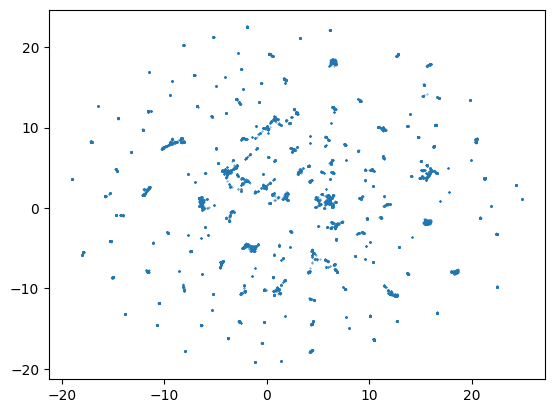

In [414]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1)


In [415]:

labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

In [417]:
train['lab'] = labels

In [440]:
train[(train['Дата обращения'] >= '2018-01-27') & (train['Дата обращения'] < '2018-01-28') & (train['Содержание'] == 'Отсутствует загрузка ОС на ноутбуке')]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,lab
935,Отсутствует загрузка ОС на ноутбуке,АРМ,3-Низкий,Закрыт,ФГ185,2018-02-04 06:54:00,2018-01-27 04:01:00,Запрос,Инцидент,Причина: Отсутствует загрузка ОС на ноутбуке\n...,1,2018-02-01 06:58:00,2018-02-08 08:23:00,4-Нет,3-Малое,База,Место20,9


In [432]:
train[train['Тип обращения итоговый'] != train['Тип обращения на момент подачи']]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,lab
917,Система58Забракованные исходящие ЭС,Сервис58,2-Средний,Закрыт,ФГ716,2018-02-09 09:36:00,2018-01-27 02:40:00,Инцидент,Запрос,РС подтвердил ошибку.\nСозданы ********* и зая...,2,2018-02-07 05:49:00,2018-02-14 07:52:00,1-Особая,4-Нет влияния,Система58,Место1,11
927,"Заявка Сервис27 зависла в стадии ""Ожидает утв...",Сервис11,3-Низкий,Закрыт,ФГ62,2018-02-01 04:17:00,2018-01-27 03:25:00,Запрос,Инцидент,По заявке *********** создан инцидент №*******...,1,2018-01-27 06:08:00,2018-01-27 06:29:00,4-Нет,3-Малое,Система11,Место216,9
929,.Невозможно передать операцию от ответисполнит...,Сервис21,2-Средний,Закрыт,ФГ41,2018-02-01 07:51:00,2018-01-27 03:33:00,Инцидент,Запрос,"Бракуем заявку клиенту, просим новую. Ведется ...",2,2018-01-27 06:22:00,2018-02-03 07:52:00,1-Особая,3-Малое,Система21,Место185,10
930,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-01-31 12:36:00,2018-01-27 03:35:00,Инцидент,Запрос,Добрый день. Контрагент добавлен в справочник ...,2,2018-01-27 04:03:00,2018-01-27 06:51:00,3-Базовая,4-Нет влияния,Система18,Место159,9
935,Отсутствует загрузка ОС на ноутбуке,АРМ,3-Низкий,Закрыт,ФГ185,2018-02-04 06:54:00,2018-01-27 04:01:00,Запрос,Инцидент,Причина: Отсутствует загрузка ОС на ноутбуке\n...,1,2018-02-01 06:58:00,2018-02-08 08:23:00,4-Нет,3-Малое,База,Место20,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 07:03:00,2018-02-16 10:03:00,Инцидент,Запрос,"В Система18 добавлен контрагент ""*************...",2,2018-02-16 10:12:00,2018-02-16 11:44:00,3-Базовая,4-Нет влияния,Система18,Место24,9
14603,Не ходят ответы в Система21,Сервис21,2-Средний,Закрыт,ФГ153,2018-02-16 14:06:00,2018-02-16 10:06:00,Запрос,Инцидент,Перезапуск канала между Система26 1 и Система2 1.,1,2018-02-16 10:34:00,2018-02-23 11:52:00,1-Особая,3-Малое,Система21,Место51,9
14651,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ62,2018-02-21 07:26:00,2018-02-16 10:26:00,Инцидент,Запрос,Предоставлена консультация по выгрузке исполне...,2,2018-02-16 11:45:00,2018-02-23 13:05:00,3-Базовая,4-Нет влияния,Система18,Место102,9
14785,Не работает МФУ,Сервис25,3-Низкий,Закрыт,ФГ295,2018-02-21 12:31:00,2018-02-16 12:49:00,Запрос,Инцидент,Восстановление работоспособности МФУ. Проверка...,1,2018-02-16 14:20:00,2018-02-16 14:31:00,4-Нет,4-Нет влияния,Система25,Место11,9


In [431]:
train[train['Крайний срок'] < '2018-02'].sort_values('Крайний срок')

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,lab
4119,36 заявка,АРМ,3-Низкий,Отменен,ФГ250,2017-03-08 11:36:00,2018-02-01 06:46:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-02 09:37:00,NaT,4-Нет,3-Малое,База,Место163,9
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К,9
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К,9
111,Устранение ошибки,Сервис12,2-Средний,Закрыт,ФГ18,2018-01-26 13:49:00,2018-01-26 05:49:00,Запрос,Запрос,"Выполнена проверка, необходимые права есть, ко...",0,2018-01-26 06:21:00,2018-01-26 06:28:00,1-Особая,3-Малое,Система35,Место63,10
269,Не может работать один или несколько Пользоват...,Сервис121,3-Низкий,Закрыт,ФГ19,2018-01-26 15:27:00,2018-01-26 07:27:00,Инцидент,Инцидент,Временный сбой Приложения.\nРабота восстановлена,0,2018-01-26 07:53:00,2018-02-02 09:13:00,2-Повышенная,3-Малое,Система125,#Н/Д,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Настройка Система8 (для учёта выполненных работ),Сервис8,3-Низкий,Закрыт,ФГ129,2018-01-31 15:34:00,2018-01-26 14:19:00,Запрос,Запрос,выполнено,0,2018-01-26 14:35:00,2018-02-03 06:52:00,2-Повышенная,3-Малое,Система8,Место31,7
719,Настройка Система8 (для учёта выполненных работ),Сервис8,3-Низкий,Закрыт,ФГ129,2018-01-31 15:35:00,2018-01-26 14:20:00,Запрос,Запрос,выполнено,0,2018-01-26 14:34:00,2018-02-03 06:52:00,2-Повышенная,3-Малое,Система8,Место31,7
3380,Устранение ошибки,Сервис12,2-Средний,Закрыт,ФГ401,2018-01-31 17:30:00,2018-01-31 09:30:00,Инцидент,Инцидент,Оказана консультация,0,2018-01-31 12:27:00,2018-02-07 13:46:00,1-Особая,3-Малое,Система35,Место6,10
3393,Устранение ошибки,Сервис12,2-Средний,Отменен,ФГ368,2018-01-31 17:45:00,2018-01-31 09:45:00,Инцидент,Инцидент,Запрос отменён пользователем из портала самооб...,0,2018-02-01 03:28:00,NaT,1-Особая,3-Малое,Система35,Место157,10


In [422]:
train[train['Статус'] == 'Отменен']

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,lab
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К,9
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К,9
12,Запрос на изменение учетной записи Система21,Сервис21,2-Средний,Отменен,ФГ360,2018-01-31 07:51:00,2018-01-25 23:49:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-01-26 00:36:00,NaT,1-Особая,3-Малое,Система21,Место197,10
19,Изменение атрибутов учётной записи,Сервис7,2-Средний,Отменен,ФГ13,2018-01-31 07:51:00,2018-01-26 01:34:00,Запрос,Запрос,тестовый запрос,0,NaT,2018-01-26 01:38:00,1-Особая,4-Нет влияния,Система7,Место20,10
49,Разблокировать доменную учетную запись пользов...,АРМ,3-Низкий,Отменен,ФГ430,2018-01-31 07:51:00,2018-01-26 02:57:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-01-26 04:49:00,NaT,4-Нет,3-Малое,База,Место106,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14663,Сервисы SNS#1 - Базовые сервисы,Сервис2,3-Низкий,Отменен,ФГ414,2018-02-21 11:51:00,2018-02-16 10:36:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 15:08:00,NaT,4-Нет,4-Нет влияния,Система2,Место64,8
14678,(Адре№118)(Копирование)(Нет)(Нарочно) КМР,Сервис25,3-Низкий,Отменен,ФГ76,2018-02-21 12:08:00,2018-02-16 10:53:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-16 10:56:00,NaT,4-Нет,4-Нет влияния,Система25,Место55,10
14724,Ремонт двери,Сервис73,3-Низкий,Отменен,ФГ472,2018-02-21 13:04:00,2018-02-16 11:49:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-17 07:43:00,NaT,4-Нет,4-Нет влияния,Система71,Место200,10
14748,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Отменен,ФГ277,2018-02-21 13:33:00,2018-02-16 12:18:00,Запрос,Запрос,Запрос отменён пользователем из портала самооб...,0,2018-02-18 10:03:00,NaT,4-Нет,4-Нет влияния,Система2,Место42,8


In [420]:
train[train['lab'] == 9]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,lab
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К,9
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К,9
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177,9
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19:00,2018-02-02 07:52:00,4-Нет,4-Нет влияния,Система62,Место216,9
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51:00,2018-01-25 23:39:00,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20:00,2018-02-02 07:52:00,4-Нет,4-Нет влияния,Система62,Место216,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14746,Разблокировка учетной записи Система62,АРМ,3-Низкий,Закрыт,ФГ38,2018-02-21 13:29:00,2018-02-16 12:14:00,Запрос,Запрос,Доступ восстановлен.\nБлокировка была произвед...,0,2018-02-17 10:36:00,2018-02-24 12:49:00,4-Нет,4-Нет влияния,База,Место57,9
14779,.Стационарный телефон (плохая связь),Сервис93,3-Низкий,Закрыт,ФГ234,2018-02-17 11:40:00,2018-02-16 12:40:00,Инцидент,Инцидент,Замена Т/А,0,2018-02-16 15:05:00,2018-02-16 15:15:00,2-Повышенная,3-Малое,Система92,Место116,9
14785,Не работает МФУ,Сервис25,3-Низкий,Закрыт,ФГ295,2018-02-21 12:31:00,2018-02-16 12:49:00,Запрос,Инцидент,Восстановление работоспособности МФУ. Проверка...,1,2018-02-16 14:20:00,2018-02-16 14:31:00,4-Нет,4-Нет влияния,Система25,Место11,9
14790,У пользователя отсутствует ярлык Система500 От...,Сервис55,2-Средний,Закрыт,ФГ42,2018-02-17 05:50:00,2018-02-16 12:50:00,Запрос,Инцидент,Скорректирована УЗ пользователя в Система11 (к...,1,2018-02-17 00:11:00,2018-02-24 07:54:00,1-Особая,3-Малое,Система11,Место10,9


In [1]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [35]:
p = train[train['Тип обращения итоговый'] != train['Тип обращения на момент подачи']]

In [37]:
p['tip'] = [0 if k == 'Запрос' else 1 for k in p['Тип обращения итоговый'] ]

/var/folders/1k/69qd46t528dd_ghd7c8w8yb40000gn/T/ipykernel_71204/1993224557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['tip'] = [0 if k == 'Запрос' else 1 for k in p['Тип обращения итоговый'] ]


In [38]:
p

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,tip
917,Система58Забракованные исходящие ЭС,Сервис58,2-Средний,Закрыт,ФГ716,2018-02-09 09:36:00,2018-01-27 02:40:00,Инцидент,Запрос,РС подтвердил ошибку.\nСозданы ********* и зая...,2,2018-02-07 05:49:00,2018-02-14 07:52:00,1-Особая,4-Нет влияния,Система58,Место1,0
927,"Заявка Сервис27 зависла в стадии ""Ожидает утв...",Сервис11,3-Низкий,Закрыт,ФГ62,2018-02-01 04:17:00,2018-01-27 03:25:00,Запрос,Инцидент,По заявке *********** создан инцидент №*******...,1,2018-01-27 06:08:00,2018-01-27 06:29:00,4-Нет,3-Малое,Система11,Место216,1
929,.Невозможно передать операцию от ответисполнит...,Сервис21,2-Средний,Закрыт,ФГ41,2018-02-01 07:51:00,2018-01-27 03:33:00,Инцидент,Запрос,"Бракуем заявку клиенту, просим новую. Ведется ...",2,2018-01-27 06:22:00,2018-02-03 07:52:00,1-Особая,3-Малое,Система21,Место185,0
930,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-01-31 12:36:00,2018-01-27 03:35:00,Инцидент,Запрос,Добрый день. Контрагент добавлен в справочник ...,2,2018-01-27 04:03:00,2018-01-27 06:51:00,3-Базовая,4-Нет влияния,Система18,Место159,0
935,Отсутствует загрузка ОС на ноутбуке,АРМ,3-Низкий,Закрыт,ФГ185,2018-02-04 06:54:00,2018-01-27 04:01:00,Запрос,Инцидент,Причина: Отсутствует загрузка ОС на ноутбуке\n...,1,2018-02-01 06:58:00,2018-02-08 08:23:00,4-Нет,3-Малое,База,Место20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 07:03:00,2018-02-16 10:03:00,Инцидент,Запрос,"В Система18 добавлен контрагент ""*************...",2,2018-02-16 10:12:00,2018-02-16 11:44:00,3-Базовая,4-Нет влияния,Система18,Место24,0
14603,Не ходят ответы в Система21,Сервис21,2-Средний,Закрыт,ФГ153,2018-02-16 14:06:00,2018-02-16 10:06:00,Запрос,Инцидент,Перезапуск канала между Система26 1 и Система2 1.,1,2018-02-16 10:34:00,2018-02-23 11:52:00,1-Особая,3-Малое,Система21,Место51,1
14651,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ62,2018-02-21 07:26:00,2018-02-16 10:26:00,Инцидент,Запрос,Предоставлена консультация по выгрузке исполне...,2,2018-02-16 11:45:00,2018-02-23 13:05:00,3-Базовая,4-Нет влияния,Система18,Место102,0
14785,Не работает МФУ,Сервис25,3-Низкий,Закрыт,ФГ295,2018-02-21 12:31:00,2018-02-16 12:49:00,Запрос,Инцидент,Восстановление работоспособности МФУ. Проверка...,1,2018-02-16 14:20:00,2018-02-16 14:31:00,4-Нет,4-Нет влияния,Система25,Место11,1


In [13]:
hz = p['Содержание'] + ' ' + p['Решение']

In [20]:
hz[14651]

'Сообщить об ошибке/неисправности Система18 Предоставлена консультация по выгрузке исполнений из Сервис22, исполнение успешно выгружено.'

In [24]:
ans = []


sequence_to_classify = hz[14651]
candidate_labels = ["Инцидент", "Запрос"]
output = classifier(sequence_to_classify, candidate_labels, multi_label=False)
ans.append(0 if output['labels'][np.argmax(output['scores'])] == 'Запрос' else 1)

In [55]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __len__(self):
        return len(hz.values)

    def __getitem__(self, i):
        return hz.values[i]

In [56]:
dataset = MyDataset()

In [57]:
ans

[0]

In [58]:
output['labels'][np.argmax(output['scores'])]

'Запрос'

In [63]:
candidate_labels = ["Инцидент", "Запрос"]
ans = []
trues = []
for l, i in enumerate(hz.values):
    output = classifier(i, candidate_labels, multi_label=False)
    ans.append(0 if output['labels'][np.argmax(output['scores'])] == 'Запрос' else 1)
    trues.append(p['tip'].values[l])

In [ ]:
output = classifier(i, candidate_labels, multi_label=False)

In [66]:
from sklearn.metrics import f1_score

f1_score(ans, trues, average='macro')

0.5266086175494623

In [67]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3
